In [1]:
from transformers import pipeline

import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt

2024-05-01 13:47:56.704461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 13:47:57.803291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [3]:
filename = os.path.join("..", "in", "Game_of_Thrones_Script.csv")
data = pd.read_csv(filename)

In [4]:
data.dropna(inplace=True)

In [5]:
simple_data = data.loc[:, ["Season", "labels"]]

KeyError: "['labels'] not in index"

In [20]:
print(simple_data)

         Season    labels
0      Season 1   disgust
1      Season 1   disgust
2      Season 1  surprise
3      Season 1   neutral
4      Season 1      fear
...         ...       ...
23906  Season 8   neutral
23907  Season 8   disgust
23908  Season 8   disgust
23909  Season 8  surprise
23910  Season 8  surprise

[23907 rows x 2 columns]


In [6]:
labels = []
for line in data["Sentence"]:
        label = classifier(line)
        labels.append(label[0]["label"])


KeyboardInterrupt: 

In [82]:
line

NameError: name 'line' is not defined

In [12]:
print(labels)

['disgust', 'disgust', 'surprise', 'neutral', 'fear', 'fear', 'neutral', 'surprise', 'anger', 'anger', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'anger', 'neutral', 'neutral', 'joy', 'neutral', 'neutral', 'neutral', 'surprise', 'disgust', 'neutral', 'surprise', 'disgust', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sadness', 'neutral', 'anger', 'neutral', 'fear', 'neutral', 'neutral', 'sadness', 'neutral', 'surprise', 'disgust', 'anger', 'neutral', 'anger', 'surprise', 'neutral', 'surprise', 'anger', 'surprise', 'neutral', 'neutral', 'disgust', 'disgust', 'disgust', 'neutral', 'neutral', 'anger', 'sadness', 'neutral', 'neutral', 'neutral', 'anger', 'anger', 'anger', 'anger', 'sadness', 'neutral', 'anger', 'surprise', 'anger', 'surprise', 'neutral', 'fear', 'fear', 'fear', 'anger', 'neutral', 'sadness', 'anger', 'disgust', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'sadness', 'neutral', 'sadness', 'neutral', 'neutral', 'neutra

In [13]:
data["labels"] = labels

In [14]:
print(data)

      Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sen

In [21]:
outpath = os.path.join("..", "out", "labels.csv")
simple_data.to_csv(outpath)

In [2]:
filename = os.path.join("..", "out", "labels.csv")
data = pd.read_csv(filename)

In [41]:
print(data)

       Unnamed: 0    Season    labels
0               0  Season 1   disgust
1               1  Season 1   disgust
2               2  Season 1  surprise
3               3  Season 1   neutral
4               4  Season 1      fear
...           ...       ...       ...
23902       23906  Season 8   neutral
23903       23907  Season 8   disgust
23904       23908  Season 8   disgust
23905       23909  Season 8  surprise
23906       23910  Season 8  surprise

[23907 rows x 3 columns]


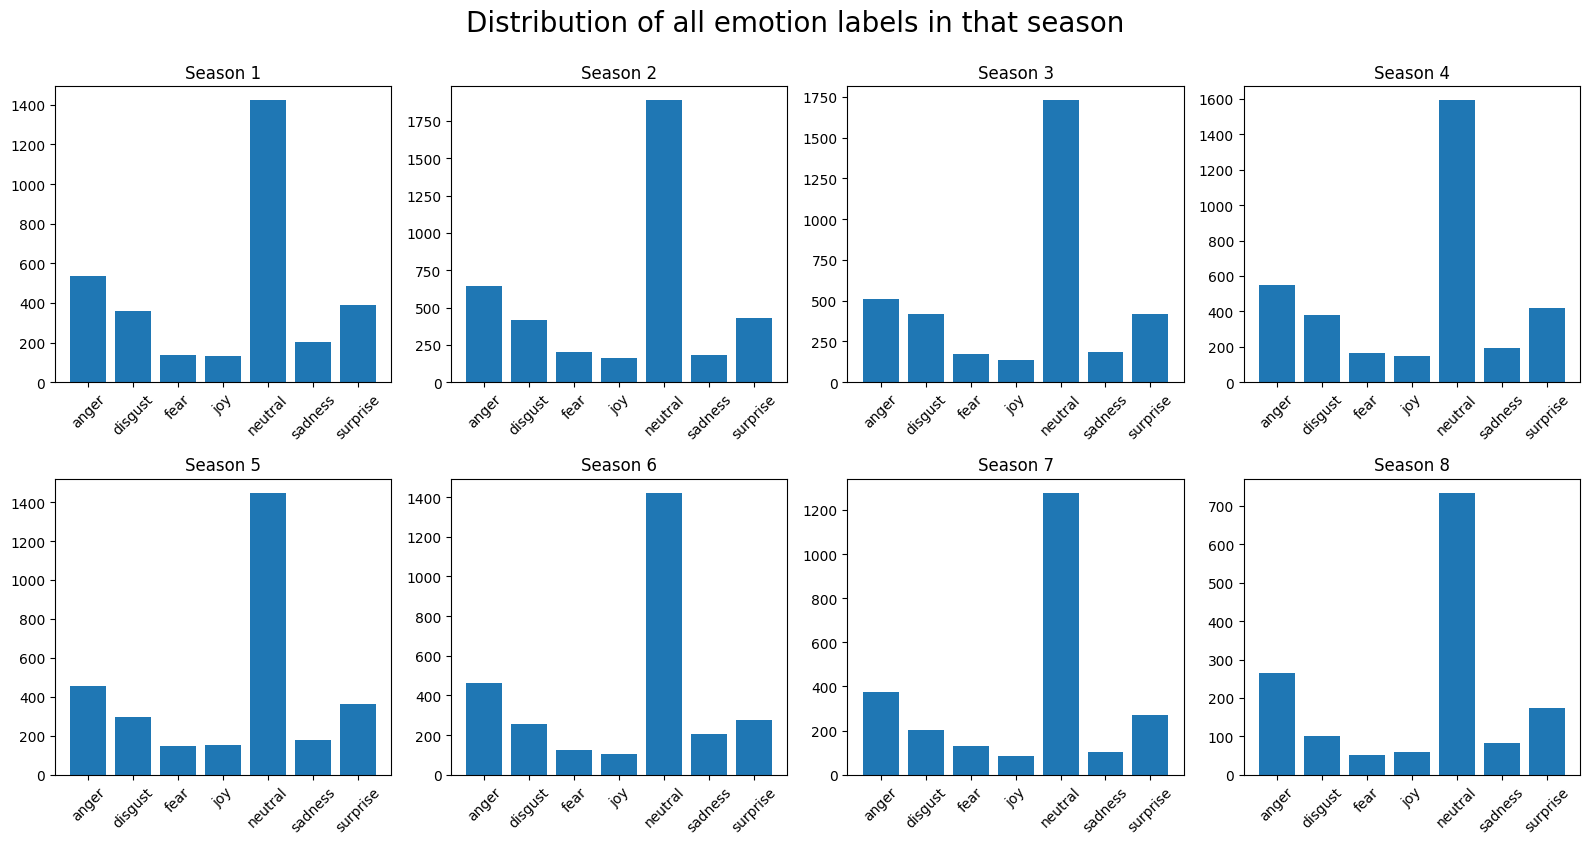

In [77]:
unique_seasons = data['Season'].unique()
unique_labels = data['labels'].unique()

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for idx, season in enumerate(unique_seasons):
    season_data = data[data['Season'] == season]
    label_counts = season_data['labels'].value_counts().sort_index()
    axs[idx].bar(label_counts.index, label_counts.values)
    axs[idx].tick_params(axis='x', which='major', rotation=45)
    axs[idx].set_title(season)

plt.tight_layout()
fig.suptitle("Distribution of all emotion labels in that season", fontsize = 20, y=1.05)
plt.show()

In [ ]:
uni

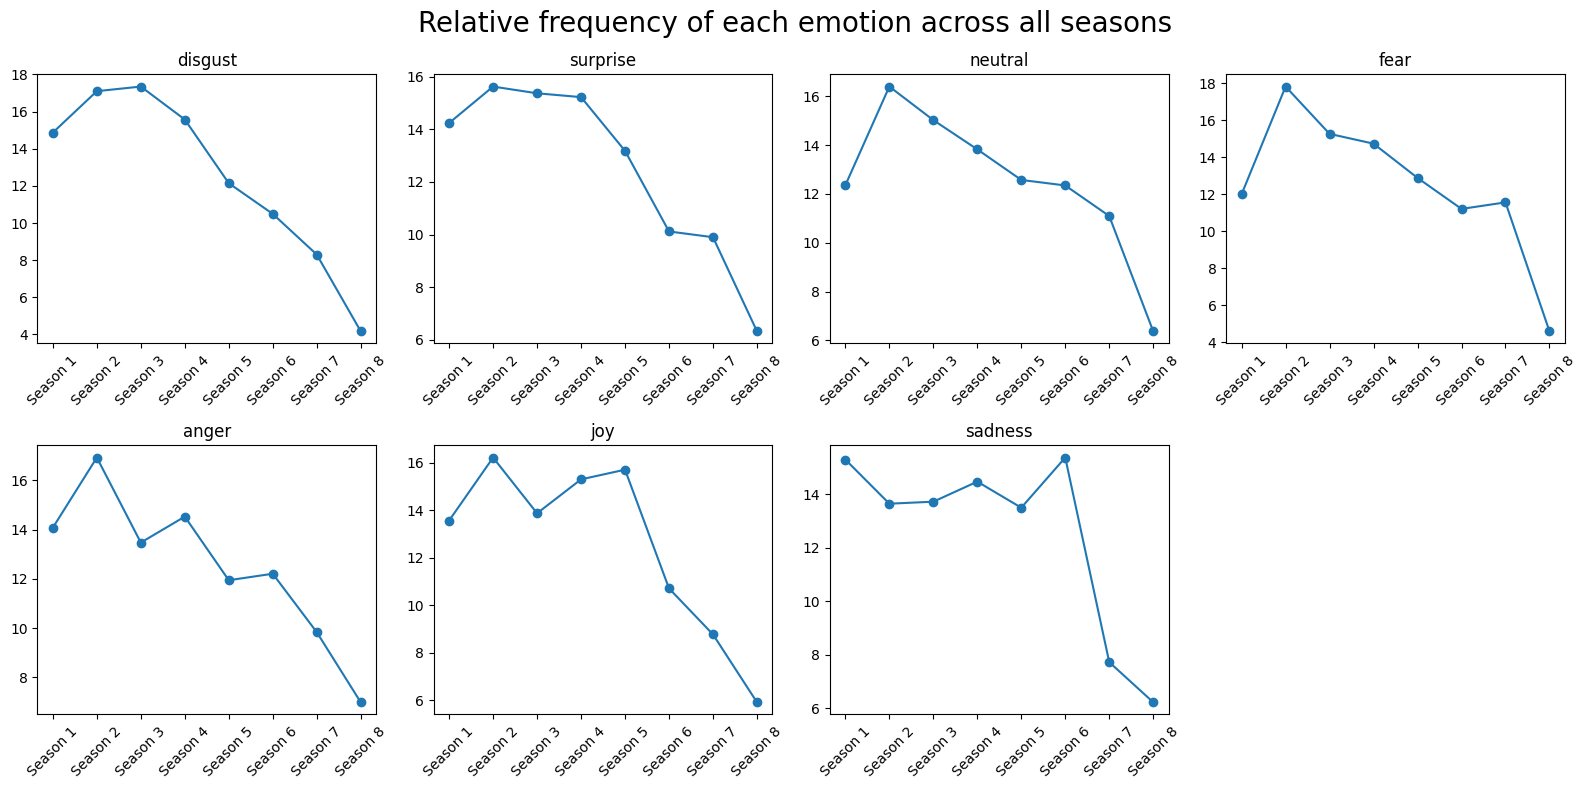

In [74]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()
axs[7].axis('off')

for idx, label in enumerate(unique_labels):
    label_data = data[data['labels'] == label]
    season_counts = label_data['Season'].value_counts(normalize=True) * 100
    season_counts = season_counts.sort_index()  # Sort by index to ensure proper line plot
    axs[idx].plot(season_counts.index, season_counts.values, marker='o')
    axs[idx].tick_params(axis='x', which='major', rotation=45)  # Ensure major tick rotation
    axs[idx].set_title(label)
    

fig.suptitle("Relative frequency of each emotion across all seasons", fontsize = 20)
plt.tight_layout()
plt.show()
